<a href="https://colab.research.google.com/github/MinkwonJeon/deeplearning/blob/main/%EC%84%A0%EC%88%98%EC%97%B0%EB%B4%89%EC%98%88%EC%B8%A1_1112.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### train을 사용하여 학습 후, test를 사용하여 관객수 도출

## 데이터 전처리 : 모두 숫자열로
- right=0, left=1/
GK=0, ST=1 MF=2, DF=3/
africa=0, asia=1, europe=2, oceania=3, south america=4

- 오류처리 : train_y = train_y[:,:].astype(float) /
train_x = train_x[:,:].astype(float) 사용


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense  #(Dense)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!cp '/content/drive/MyDrive/cau_temp/FIFA_test.csv' ./

In [4]:
!cp '/content/drive/MyDrive/cau_temp/FIFA_train.csv' ./

In [5]:

!cp '/content/drive/MyDrive/cau_temp/submission.csv' ./

cp: cannot stat '/content/drive/MyDrive/cau_temp/submission.csv': No such file or directory


In [6]:
!ls -al

total 704
drwxr-xr-x 1 root root   4096 Aug 29 12:03  .
drwxr-xr-x 1 root root   4096 Aug 29 11:47  ..
drwxr-xr-x 4 root root   4096 Aug 25 13:35  .config
drwx------ 5 root root   4096 Aug 29 11:50  drive
-rw------- 1 root root 159571 Aug 29 12:48  FIFA_test.csv
-rw------- 1 root root 438463 Aug 29 12:48  FIFA_train.csv
drwxr-xr-x 1 root root   4096 Aug 25 13:35  sample_data
-rw-r--r-- 1 root root    133 Aug 29 12:02 'sample_data\submission.csv'
-rw-r--r-- 1 root root  90796 Aug 29 12:43  submission.csv


In [7]:
!head FIFA_train.csv

name,id,continent,age,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
L. Messi,0,4,31,2021,1,1,5,94,94,4,110500000
De Gea,3,2,27,2020,0,0,4,91,93,1,72000000
L. Suárez,7,4,31,2021,1,0,5,91,91,3,80000000
Sergio Ramos,8,2,32,2020,0,0,4,91,91,3,51000000
J. Oblak,9,2,25,2021,0,0,3,90,93,1,68000000
D. Godín,12,4,32,2019,3,0,3,90,90,2,44000000
David Silva,13,2,32,2020,2,1,4,90,90,4,60000000
N. Kanté,14,2,27,2023,2,0,3,89,90,2,63000000
M. ter Stegen,18,2,26,2022,0,0,3,89,92,1,58000000


In [8]:
invest=pd.read_csv('FIFA_train.csv')
invest.head()


,name,id,continent,age,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,L. Messi,0,4,31,2021,1,1,5,94,94,4,110500000
1,De Gea,3,2,27,2020,0,0,4,91,93,1,72000000
2,L. Suárez,7,4,31,2021,1,0,5,91,91,3,80000000
3,Sergio Ramos,8,2,32,2020,0,0,4,91,91,3,51000000
4,J. Oblak,9,2,25,2021,0,0,3,90,93,1,68000000


In [9]:
invest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8932 entries, 0 to 8931
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   name              8932 non-null   object
 1   id                8932 non-null   int64 
 2   continent         8932 non-null   int64 
 3   age               8932 non-null   int64 
 4   contract_until    8932 non-null   int64 
 5   position          8932 non-null   int64 
 6   prefer_foot       8932 non-null   int64 
 7   reputation        8932 non-null   int64 
 8   stat_overall      8932 non-null   int64 
 9   stat_potential    8932 non-null   int64 
 10  stat_skill_moves  8932 non-null   int64 
 11  value             8932 non-null   int64 
dtypes: int64(11), object(1)
memory usage: 837.5+ KB


In [10]:
data=invest.to_numpy()
print(data.shape)
print(data[:5])

(8932, 12)
[['L. Messi' 0 4 31 2021 1 1 5 94 94 4 110500000]
 ['De Gea' 3 2 27 2020 0 0 4 91 93 1 72000000]
 ['L. Suárez' 7 4 31 2021 1 0 5 91 91 3 80000000]
 ['Sergio Ramos' 8 2 32 2020 0 0 4 91 91 3 51000000]
 ['J. Oblak' 9 2 25 2021 0 0 3 90 93 1 68000000]]


In [11]:
np.random.shuffle(data)

x = data[:,1:11]
y = data[:,11:]

split_index = 7443

train_x, test_x = x[:split_index], x[split_index:]
train_y, test_y = y[:split_index], y[split_index:]

print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)
print(train_x[:5])
print(train_y[:5])
print(test_x[:5])
print(test_y[:5])

(7443, 10)
(7443, 1)
(1489, 10)
(1489, 1)
[[7434 2 30 2019 2 0 1 67 67 3]
 [4068 4 24 2022 3 1 1 71 75 3]
 [14516 2 18 2020 2 1 1 59 79 3]
 [2039 1 36 2019 0 0 2 74 74 1]
 [9546 0 21 2021 1 1 1 65 74 3]]
[[725000]
 [2600000]
 [325000]
 [750000]
 [850000]]
[[15613 4 24 2021 0 0 1 56 62 1]
 [274 4 27 2022 3 0 3 82 83 2]
 [4011 2 24 2022 0 0 1 71 79 1]
 [2257 4 30 2021 2 0 1 74 74 4]
 [14739 2 24 2019 2 0 1 59 63 2]]
[[90000]
 [21000000]
 [2600000]
 [5500000]
 [200000]]


In [12]:
#normalization
min = np.min(y)
max = np.max(y)
y = (y-min) / (max-min)
print(np.min(y), np.max(y))

0.0 1.0


In [13]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import *

In [14]:
print(train_x.shape)
print(train_x.shape[1])
print(train_y.shape)
print(train_y.shape[1])

(7443, 10)
10
(7443, 1)
1


In [15]:
model = keras.Sequential([
    Dense(2000, activation='relu', input_shape=(train_x.shape[1],)),
    Dense(2000, activation='relu'),
    Dense(train_y.shape[1])
])
    

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2000)              22000     
_________________________________________________________________
dense_1 (Dense)              (None, 2000)              4002000   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 2001      
Total params: 4,026,001
Trainable params: 4,026,001
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.compile(optimizer='adam',
              loss='mse',
              metrics=['mae'])

In [18]:
type(train_x)

numpy.ndarray

In [19]:
train_y = train_y[:,:].astype(float)
train_x = train_x[:,:].astype(float)

In [20]:
# copy from https://gist.github.com/stared/dfb4dfaf6d9a8501cd1cc8b8cb806d2e

from IPython.display import clear_output
from tensorflow.keras.callbacks import Callback

class PlotLosses(Callback):

  def on_train_begin(self, logs={}):

    self.i = 0
    self.x = []
    self.losses = []
    self.val_losses = []

    self.fig = plt.figure()

    self.logs = []


  def on_epoch_end(self, epoch, logs={}):

    self.logs.append(logs)
    self.x.append(self.i)
    self.losses.append(logs.get('loss'))
    self.val_losses.append(logs.get('val_loss'))
    self.i += 1

    clear_output(wait=True)
    plt.plot(self.x, self.losses, label="loss")
    plt.plot(self.x, self.val_losses, label="val_loss")
    plt.legend()
    plt.show();
    print("loss = ", self.losses[-1], ", val_loss = ", self.val_losses[-1])

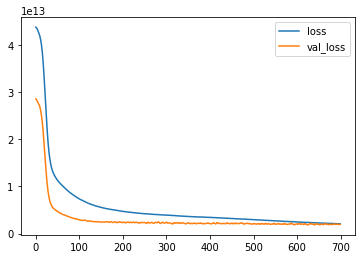

loss =  2080068075520.0 , val_loss =  1939939131392.0


In [21]:
plot_losses = PlotLosses()
history = model.fit(train_x, train_y, epochs=700, verbose=1, batch_size=2048, validation_split=0.1,callbacks=[plot_losses])

In [22]:
test_y = test_y[:,:].astype(float)
test_x = test_x[:,:].astype(float)

In [23]:
loss, mae = model.evaluate(test_x, test_y, batch_size=2048)

print("loss :", loss)
print("mae :", mae)

1/1 [==============================] - 0s 19ms/step - loss: 1166238416896.0000 - mae: 414339.3125
loss : 1166238416896.0
mae : 414339.3125


In [24]:
y_ = model.predict(test_x)
print(y_[:10])

[[  -74573.8  ]
 [19319842.   ]
 [ 2950921.5  ]
 [ 4674846.   ]
 [   70045.83 ]
 [   57891.016]
 [  677370.8  ]
 [  120179.016]
 [ 4926217.5  ]
 [  282720.7  ]]



# FIFA_test 파일 예측
- 데이터 전처리O


np.random.shuffle(data)



In [25]:
pay=pd.read_csv('FIFA_test.csv')
pay.head()

,name,id,continent,age,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves
0,Cristiano Ronaldo,1,2,33,2022,1,0,5,94,94,5
1,Neymar Jr,2,4,26,2022,1,0,5,92,93,5
2,K. De Bruyne,4,2,27,2023,2,0,4,91,92,4
3,E. Hazard,5,2,27,2020,1,0,4,91,91,4
4,L. Modrić,6,2,32,2020,2,0,4,91,91,4


In [26]:
data2=pay.to_numpy()
print(data2.shape)
print(data2[:5])


t = data2[:,1:]


print(t.shape)
print(t[:5])
print(t[:,0])

(3828, 11)
[['Cristiano Ronaldo' 1 2 33 2022 1 0 5 94 94 5]
 ['Neymar Jr' 2 4 26 2022 1 0 5 92 93 5]
 ['K. De Bruyne' 4 2 27 2023 2 0 4 91 92 4]
 ['E. Hazard' 5 2 27 2020 1 0 4 91 91 4]
 ['L. Modrić' 6 2 32 2020 2 0 4 91 91 4]]
(3828, 10)
[[1 2 33 2022 1 0 5 94 94 5]
 [2 4 26 2022 1 0 5 92 93 5]
 [4 2 27 2023 2 0 4 91 92 4]
 [5 2 27 2020 1 0 4 91 91 4]
 [6 2 32 2020 2 0 4 91 91 4]]
[1 2 4 ... 16932 16937 16943]


In [27]:
t = t[:,:].astype(float)

In [28]:
y_1 = model.predict(t)
print(y_1[:,0])

[63881450.   66417884.   64384636.   ...   116067.7    108084.2
    76767.58]


In [29]:
(t[:,0])

array([1.0000e+00, 2.0000e+00, 4.0000e+00, ..., 1.6932e+04, 1.6937e+04,
       1.6943e+04])

In [30]:
print(np.vstack((t[:,0],y_1[:,0])))

[[1.00000000e+00 2.00000000e+00 4.00000000e+00 ... 1.69320000e+04
  1.69370000e+04 1.69430000e+04]
 [6.38814480e+07 6.64178840e+07 6.43846360e+07 ... 1.16067703e+05
  1.08084203e+05 7.67675781e+04]]


In [31]:
raw_data=np.vstack((t[:,0],y_1[:,0])).T
data3=pd.DataFrame(raw_data[:],columns =['id','value'])

In [32]:
data3.to_csv('submission.csv') 
